<a href="https://colab.research.google.com/github/phnss/Prova02-IA/blob/main/prova02_IA_20190023610.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROVA IA 02
##Aluno: Pedro Henrique Nogueira da Silva Santos
##Matrícula: 20190023610


In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
import math
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

sns.set()

df = pd.read_csv('student_prediction.csv', delimiter=",")

- Instalar a biblioteca para aprendizado, após a instalação reinicie o ambiente de execução (Ctrl + M + .)


In [ ]:
!pip install auto-sklearn

In [ ]:
!pip install --upgrade scikit-learn

#Questão 01 - Elabore uma solução para indentificar o output Grade do estudante.

## a) Pré-processamento dos dados

In [2]:
#Verificar o DF
df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [3]:
#verificar se há dados faltosos
print('Valores faltantes:\n', df.isnull().sum())

Valores faltantes:
 STUDENTID        0
AGE              0
GENDER           0
HS_TYPE          0
SCHOLARSHIP      0
WORK             0
ACTIVITY         0
PARTNER          0
SALARY           0
TRANSPORT        0
LIVING           0
MOTHER_EDU       0
FATHER_EDU       0
#_SIBLINGS       0
KIDS             0
MOTHER_JOB       0
FATHER_JOB       0
STUDY_HRS        0
READ_FREQ        0
READ_FREQ_SCI    0
ATTEND_DEPT      0
IMPACT           0
ATTEND           0
PREP_STUDY       0
PREP_EXAM        0
NOTES            0
LISTENS          0
LIKES_DISCUSS    0
CLASSROOM        0
CUML_GPA         0
EXP_GPA          0
COURSE ID        0
GRADE            0
dtype: int64


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [5]:
#verificar cada classe de forma geral
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,145.0,1.620690,0.613154,1.0,1.0,2.0,2.0,3.0
GENDER,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
HS_TYPE,145.0,1.944828,0.537216,1.0,2.0,2.0,2.0,3.0
SCHOLARSHIP,145.0,3.572414,0.805750,1.0,3.0,3.0,4.0,5.0
WORK,145.0,1.662069,0.474644,1.0,1.0,2.0,2.0,2.0
ACTIVITY,145.0,1.600000,0.491596,1.0,1.0,2.0,2.0,2.0
PARTNER,145.0,1.579310,0.495381,1.0,1.0,2.0,2.0,2.0
SALARY,145.0,1.627586,1.020245,1.0,1.0,1.0,2.0,5.0
TRANSPORT,145.0,1.620690,1.061112,1.0,1.0,1.0,2.0,4.0
LIVING,145.0,1.731034,0.783999,1.0,1.0,2.0,2.0,4.0


In [6]:
#Existe um erro no nome de uma das colunas, e é um erro que é mostrado pelo próprio fornecedor da Base de dados...

df.rename(columns={'KIDS':'PARENTAL_STATUS'},inplace=True)
df["PARENTAL_STATUS"]

0      1
1      1
2      1
3      1
4      1
      ..
140    2
141    1
142    1
143    1
144    1
Name: PARENTAL_STATUS, Length: 145, dtype: int64

In [7]:
#verificar se há valores duplicados
print('Valores duplicados:\n', df.duplicated())

Valores duplicados:
 0      False
1      False
2      False
3      False
4      False
       ...  
140    False
141    False
142    False
143    False
144    False
Length: 145, dtype: bool


In [8]:
#Retirar a coluna "STUDENT ID", pois ela não agrega nada de dados para nossas avaliações
df = df.drop(columns=['STUDENTID'])
df.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1


- Em relação aos dados da base, não possui nenhum dados faltoso, e nenhum dado duplicados. Todos os dados estão em forma quantitativa, não havendo necessidade de transformarção. Assim, iremos para verificar a redudância dos dados e tentar diminuir o números de classes a serem usadas. 

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,PARENTAL_STATUS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
AGE,1.000000,0.138233,0.294426,-0.316506,-0.181019,0.138233,0.042572,0.127853,0.001472,-0.199257,-0.068972,-0.070108,0.069748,0.172668,-0.200812,-0.141571,-0.172833,0.059712,0.078849,-0.226882,0.007306,0.060027,-0.044462,0.030595,-0.181121,0.235576,-0.100812,0.228884,0.172597,0.121441,-0.304994,-0.095251
GENDER,0.138233,1.000000,0.126218,-0.206876,0.190476,0.224138,-0.125471,-0.022154,-0.013313,-0.154957,0.062370,0.120638,0.060216,-0.028781,-0.056143,-0.033997,-0.067750,0.045206,-0.005233,-0.363971,-0.144138,-0.065795,-0.032164,-0.013833,0.065013,-0.184238,0.065449,0.223095,0.241033,0.292842,-0.430704,0.335533
HS_TYPE,0.294426,0.126218,1.000000,-0.086965,-0.155331,0.073627,0.016557,-0.126440,0.023944,-0.018990,-0.166336,-0.134322,0.051827,0.009990,-0.050269,-0.131680,-0.174719,-0.010144,0.050529,-0.009101,0.124317,-0.032180,-0.027258,-0.053034,0.053969,0.123405,-0.082461,0.055107,0.019802,0.053497,-0.118761,0.104821
SCHOLARSHIP,-0.316506,-0.206876,-0.086965,1.000000,0.055351,-0.154281,0.120346,-0.119024,0.028288,0.036543,-0.109006,-0.222776,-0.037831,-0.005450,0.023919,-0.012785,0.003758,0.008877,0.061543,0.214838,0.041443,-0.141190,0.027357,0.005529,0.164447,0.018147,0.147922,-0.095411,0.236460,0.243517,0.317563,0.023963
WORK,-0.181019,0.190476,-0.155331,0.055351,1.000000,0.220238,0.100010,-0.118284,0.102223,-0.152641,0.153780,0.205138,-0.134003,-0.165492,-0.044113,0.005919,-0.114824,-0.096332,-0.171384,-0.018640,-0.120973,0.028198,-0.153273,-0.246770,-0.033757,-0.158217,0.078973,0.027762,0.034666,0.007706,-0.114794,0.167445
ACTIVITY,0.138233,0.224138,0.073627,-0.154281,0.220238,1.000000,-0.011406,0.060922,0.026626,-0.227030,-0.122430,-0.113252,0.143273,-0.057563,-0.161412,0.019123,-0.129342,-0.281283,-0.214557,-0.020602,-0.024023,0.098693,-0.124062,-0.117580,-0.035007,0.004187,-0.028050,0.135949,0.002171,-0.092476,-0.326711,-0.062993
PARTNER,0.042572,-0.125471,0.016557,0.120346,0.100010,-0.011406,1.000000,-0.078556,0.037811,-0.168201,-0.043001,0.045241,0.033182,-0.128034,-0.211091,-0.176901,0.048897,0.090581,-0.004119,0.103634,0.038636,0.154225,-0.191197,-0.031005,0.005818,-0.054734,-0.000480,-0.082664,-0.058479,-0.012658,0.068769,-0.051778
SALARY,0.127853,-0.022154,-0.126440,-0.119024,-0.118284,0.060922,-0.078556,1.000000,-0.015926,0.030177,0.123932,0.031212,0.007866,0.101380,0.028451,-0.109689,-0.097935,-0.072357,0.009390,-0.106800,0.059872,0.111506,0.213079,0.048955,-0.235900,-0.050648,-0.031225,-0.037184,-0.100950,-0.058644,-0.123024,-0.166352
TRANSPORT,0.001472,-0.013313,0.023944,0.028288,0.102223,0.026626,0.037811,-0.015926,1.000000,0.327283,0.168831,0.090659,-0.253099,-0.033565,0.274118,-0.116259,0.007134,-0.046942,-0.124146,0.059791,0.070998,-0.056759,-0.015048,-0.094471,0.022769,-0.019064,-0.134057,-0.158432,-0.036078,0.005909,0.114839,-0.156289
LIVING,-0.199257,-0.154957,-0.018990,0.036543,-0.152641,-0.227030,-0.168201,0.030177,0.327283,1.000000,0.159529,0.206439,-0.276875,-0.059119,0.384892,0.016447,-0.021241,-0.081128,-0.155241,0.179520,0.001039,-0.135860,0.132236,0.009870,0.066609,0.146396,-0.024462,-0.136949,-0.082775,-0.007332,0.271997,0.023683


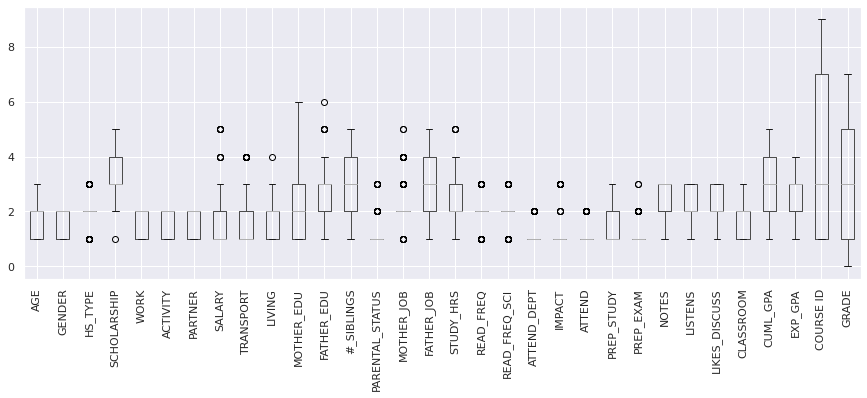

In [10]:
#Gráfico boxplot de toda a base

df.boxplot(rot=90, figsize=(15,5))

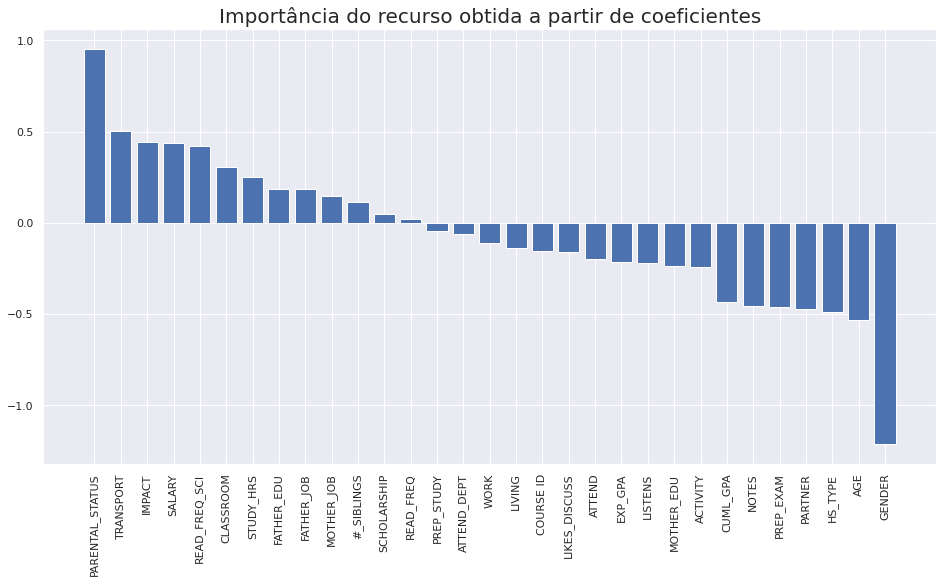

In [11]:
from sklearn.linear_model import LogisticRegression

X = df.drop(["GRADE"], axis=1)
y = df['GRADE']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1910)

model= LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

importances= pd.DataFrame(data={'Attribute':X_train.columns,'Importance':model.coef_[0]})
importances= importances.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(16,8))
plt.bar(x=importances['Attribute'],height=importances['Importance'])
plt.title('Importância do recurso obtida a partir de coeficientes',size=20)
plt.xticks(rotation='vertical')
plt.show()

- Por meio da Logistic Regression podemos ver, na semente 1910, que os Atributos: Parental_Status, Transport, Impact, salary, Read_freq, Classroom, Study_hrs, Father_job, Mother_job, Siblings, Scholarship, Read_freq; Afetam mais o atributo Grade do que os demais. Assim, pegamos eles para fazer nossa amostra.

In [12]:
df_amostra = df[['PARENTAL_STATUS', 'TRANSPORT','IMPACT', 'SALARY', 'READ_FREQ_SCI', 'CLASSROOM', 'STUDY_HRS', 'FATHER_EDU', 'MOTHER_JOB', 'SCHOLARSHIP', '#_SIBLINGS']]                 
df_amostra.head()    

,PARENTAL_STATUS,TRANSPORT,IMPACT,SALARY,READ_FREQ_SCI,CLASSROOM,STUDY_HRS,FATHER_EDU,MOTHER_JOB,SCHOLARSHIP,#_SIBLINGS
0,1,1,1,1,2,2,3,2,2,3,3
1,1,1,1,1,2,2,2,3,2,3,2
2,1,4,1,2,2,1,2,2,2,3,2
3,1,1,1,2,2,1,3,2,2,3,5
4,1,1,1,3,1,1,2,3,2,3,2


## b) Boxplot dos dados de saída e oversampling e undersampling

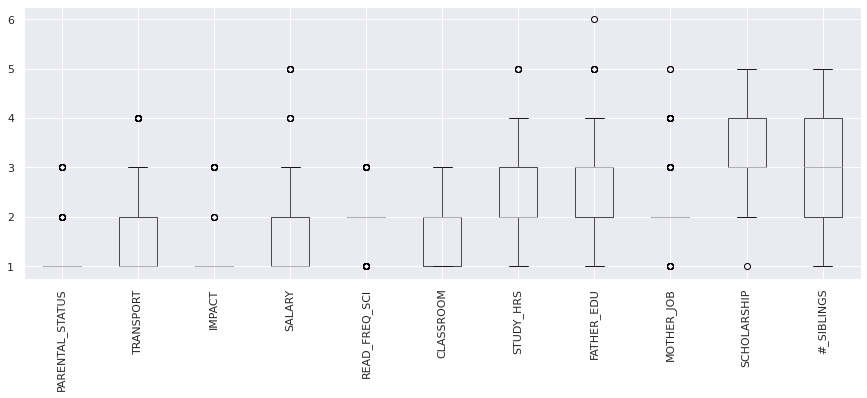

In [13]:
# Mostrar o gráfico box plot da amostra
df_amostra.boxplot(rot=90, figsize=(15,5))

Text(0, 0.5, '')

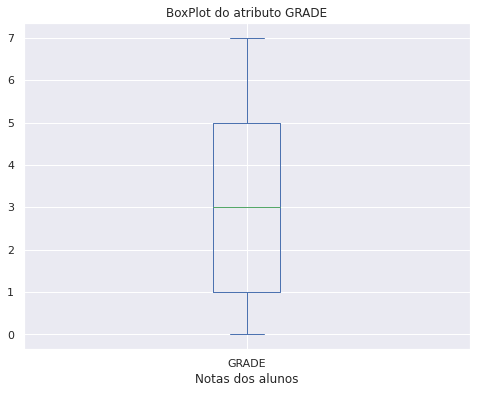

In [14]:
# Plotando o gráfico boxplot do atributo de saída

fig = plt.figure(figsize=(8,6))
ax = fig.gca()
df['GRADE'].plot.box(ax=ax) # Alternative
ax.set_title('BoxPlot do atributo GRADE')
ax.set_xlabel('Notas dos alunos')
ax.set_ylabel('')

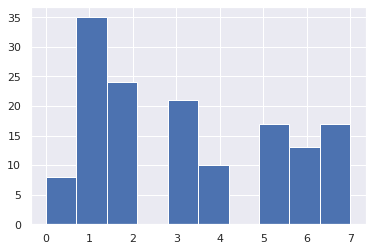

In [15]:
df['GRADE'].hist()

- Podemos visualizar que as classes do atributo GRADE possui um desbalanceamento, que prejudica na hora de aplicar os algoritmos de Machine Learning, logo é necessário tomar umas das opções de rendimensionamento de classes a fim de balancear. Duas opções que podemos ter é a de Oversampling que consiste em randomicamente duplicar dados, ou Undersampling que consiste em ramdomicamente eliminar dados. Assim, vamos usar o oversampling da df_amostras para buscar o balanceamento.

In [16]:
from imblearn.over_sampling import RandomOverSampler

X = df_amostra
y = df['GRADE']

oversample = RandomOverSampler(random_state=1910)
X_over, y_over = oversample.fit_resample(X,y)
y_over.value_counts()


1    35
2    35
5    35
0    35
3    35
4    35
7    35
6    35
Name: GRADE, dtype: int64

- Agora com os dados balanceados, podemos utilizar essa nova Base de Dados para nossos algoritmos de previsão. Podemos ver no código abaixo, a nossa DF de 145 dados, foi para 280 dados por causa do oversampling.

In [17]:
X_over.describe()

,PARENTAL_STATUS,TRANSPORT,IMPACT,SALARY,READ_FREQ_SCI,CLASSROOM,STUDY_HRS,FATHER_EDU,MOTHER_JOB,SCHOLARSHIP,#_SIBLINGS
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,1.189286,1.560714,1.260714,1.589286,2.025000,1.871429,2.242857,2.653571,2.428571,3.532143,2.907143
std,0.518365,0.929346,0.655738,1.057094,0.570559,0.823863,0.956932,1.214306,0.835098,0.775315,1.382929
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000
75%,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000
max,3.000000,4.000000,3.000000,5.000000,3.000000,3.000000,5.000000,6.000000,5.000000,5.000000,5.000000


## c) AUTOML para previsão

In [18]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

X_train, X_test, y_train, y_test = train_test_split( X_over, y_over, test_size=0.3, random_state=1910)

- agora aplicaremos o AUTOML para previsão. Usando validação cruzada estratificada 10-fold com random_state fixado em um valor.

In [25]:
automl_cv = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=6*60, #tempo total para testar os modelos
    per_run_time_limit=60,        #tempo que os modelos tem de limite para executarem suas ações
    resampling_strategy='cv',     #estratégia usada, Cross Validation
    resampling_strategy_arguments={'folds': 10}, #10 folds
    n_jobs=2,                     #números de threads que vão ser criadas para fazer a ação
    #include_estimators=["random_forest", ""],
    initial_configurations_via_metalearning=0,
    ensemble_size=1,
    seed=1910
    )
automl_cv.fit(X_train, y_train)
predictions = automl_cv.predict(X_test)

In [26]:
print(automl_cv.sprint_statistics())

auto-sklearn results:
  Dataset name: 2c669a8c-e5d8-11ec-80b9-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.704082
  Number of target algorithm runs: 28
  Number of successful target algorithm runs: 26
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [27]:
print(automl_cv.leaderboard())

          rank  ensemble_weight           type      cost   duration
model_id                                                           
2            1              1.0  random_forest  0.295918  29.259112


- O modelo o qual o AUTOML nos forneceu como melhor algoritmo, de acordo com as características especificas na função, foi o random_forest.

In [28]:
predictions = automl_cv.predict(X_test)
print("Accuracy score CV", sklearn.metrics.accuracy_score(y_test, predictions))


Accuracy score CV 0.6904761904761905


In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.33      0.21      0.26        14
           2       0.50      0.46      0.48        13
           3       0.57      0.73      0.64        11
           4       1.00      1.00      1.00        12
           5       0.67      0.75      0.71         8
           6       0.90      0.82      0.86        11
           7       0.62      0.83      0.71         6

    accuracy                           0.69        84
   macro avg       0.69      0.73      0.70        84
weighted avg       0.67      0.69      0.68        84



### Random Forest

In [43]:
#Apenas para trocar os nomes das variáveis

X = X_over
y = y_over

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1910)

#### Random Forest - Números de Florestas: 512

In [51]:
random_forest = RandomForestClassifier(
    n_estimators=512,
    n_jobs=1,
    bootstrap=True,
    criterion="gini",
    max_depth=None,
    max_features=3,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=1910
    )
random_forest.fit(X_train, y_train)
#predict = cross_val_predict(estimator = random_forest, X = X_test, y = y_test, cv = 10)
y_pred = random_forest.predict(X_test)
print("Classification Report: \n",classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.40      0.14      0.21        14
           2       0.58      0.54      0.56        13
           3       0.80      0.73      0.76        11
           4       0.92      1.00      0.96        12
           5       0.46      0.75      0.57         8
           6       0.90      0.82      0.86        11
           7       0.36      0.67      0.47         6

    accuracy                           0.68        84
   macro avg       0.67      0.71      0.67        84
weighted avg       0.68      0.68      0.66        84



Predicted,0,1,2,3,4,5,6,7,All
True,,,,,,,,,
0,9,0,0,0,0,0,0,0,9
1,1,2,3,2,1,3,1,1,14
2,0,2,7,0,0,1,0,3,13
3,0,1,0,8,0,0,0,2,11
4,0,0,0,0,12,0,0,0,12
5,0,0,1,0,0,6,0,1,8
6,0,0,0,0,0,2,9,0,11
7,0,0,1,0,0,1,0,4,6
All,10,5,12,10,13,13,10,11,84


#### Random Forest - Números de Florestas: 64

In [52]:
random_forest = RandomForestClassifier(
    n_estimators=64,
    n_jobs=1,
    bootstrap=True,
    criterion="gini",
    max_depth=None,
    max_features=3,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=1910
    )
random_forest.fit(X_train, y_train)
#predict = cross_val_predict(estimator = random_forest, X = X_test, y = y_test, cv = 10)
y_pred = random_forest.predict(X_test)
print("Classification Report: \n",classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.62      0.36      0.45        14
           2       0.64      0.54      0.58        13
           3       0.89      0.73      0.80        11
           4       0.86      1.00      0.92        12
           5       0.50      0.88      0.64         8
           6       1.00      0.82      0.90        11
           7       0.44      0.67      0.53         6

    accuracy                           0.73        84
   macro avg       0.73      0.75      0.72        84
weighted avg       0.75      0.73      0.72        84



Predicted,0,1,2,3,4,5,6,7,All
True,,,,,,,,,
0,9,0,0,0,0,0,0,0,9
1,1,5,3,1,1,2,0,1,14
2,0,3,7,0,0,1,0,2,13
3,0,0,0,8,0,1,0,2,11
4,0,0,0,0,12,0,0,0,12
5,0,0,0,0,1,7,0,0,8
6,0,0,0,0,0,2,9,0,11
7,0,0,1,0,0,1,0,4,6
All,10,8,11,9,14,14,9,9,84


#### Random Forest - Números de Florestas: 10

In [53]:
random_forest = RandomForestClassifier(
    n_estimators=10,
    n_jobs=1,
    bootstrap=True,
    criterion="gini",
    max_depth=None,
    max_features=3,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=1910
    )
random_forest.fit(X_train, y_train)
#predict = cross_val_predict(estimator = random_forest, X = X_test, y = y_test, cv = 10)
y_pred = random_forest.predict(X_test)
print("Classification Report: \n",classification_report(y_test, y_pred))

pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.45      0.36      0.40        14
           2       0.56      0.38      0.45        13
           3       1.00      0.73      0.84        11
           4       0.92      1.00      0.96        12
           5       0.50      0.75      0.60         8
           6       1.00      0.82      0.90        11
           7       0.45      0.83      0.59         6

    accuracy                           0.70        84
   macro avg       0.71      0.73      0.71        84
weighted avg       0.72      0.70      0.70        84



Predicted,0,1,2,3,4,5,6,7,All
True,,,,,,,,,
0,9,0,0,0,0,0,0,0,9
1,1,5,3,0,1,3,0,1,14
2,1,4,5,0,0,1,0,2,13
3,0,2,0,8,0,0,0,1,11
4,0,0,0,0,12,0,0,0,12
5,0,0,0,0,0,6,0,2,8
6,0,0,0,0,0,2,9,0,11
7,0,0,1,0,0,0,0,5,6
All,11,11,9,8,13,12,9,11,84


## d) Avaliando os resultados

- Nesse modelo, podemos verificar que, quando seu hiperparâmetro foi de 512(números de árvores), ele teve uma acurácia total de 0.68, mas quando foi alterado para 64, esse número aumentou para 0.73, de acordo com as configurações pré-estabelecidas na função RandoForest. Teoricamente, deveria se o contrário, com o aumento de árvores, erá para aumentar os parâmetros de avaliação do modelo. 

- Sua matriz de confusão não teve muito erros nela de Falsos positivos e negativos.

# Questão 02 - K-means e Hierárquico

In [ ]:
# Fazendo o pré-processamento feito na questão 1 para deixar a base de dados preparada para essa nova etapa
from imblearn.over_sampling import RandomOverSampler

df2= pd.read_csv('student_prediction.csv', delimiter=",")
df2.rename(columns={'KIDS':'PARENTAL_STATUS'},inplace=True)
df2 = df2.drop(columns=['STUDENTID'])

df_amostra2 = df2[['PARENTAL_STATUS', 'TRANSPORT','IMPACT', 'SALARY', 'READ_FREQ_SCI', 'CLASSROOM', 'STUDY_HRS', 
                   'FATHER_EDU', 'MOTHER_JOB', 'SCHOLARSHIP', '#_SIBLINGS']]                 

X2 = df_amostra
y2 = df['GRADE']

oversample2 = RandomOverSampler(random_state=1910)
X_over2, y_over2 = oversample.fit_resample(X2,y2)
y_over2.value_counts()



1    35
2    35
5    35
0    35
3    35
4    35
7    35
6    35
Name: GRADE, dtype: int64

In [ ]:
X2.head()

,PARENTAL_STATUS,TRANSPORT,IMPACT,SALARY,READ_FREQ_SCI,CLASSROOM,STUDY_HRS,FATHER_EDU,MOTHER_JOB,SCHOLARSHIP,#_SIBLINGS
0,1,1,1,1,2,2,3,2,2,3,3
1,1,1,1,1,2,2,2,3,2,3,2
2,1,4,1,2,2,1,2,2,2,3,2
3,1,1,1,2,2,1,3,2,2,3,5
4,1,1,1,3,1,1,2,3,2,3,2


In [ ]:
rs = RobustScaler() #normalização dos dados e para isso remove a mediana e dimensiona os dados de acordo com o intervalo quantil
X2_normalized = rs.fit_transform(X2)

## K-means - 5


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

kmeans5 = KMeans(n_clusters=5, random_state=1910)
predictionKMeans5 = kmeans5.fit(X2_normalized)
y_kmeans5 = kmeans5.predict(X2_normalized)
kmeans5.cluster_centers_.shape

#kmeans5.labels_
#kmeans5.fit_predict(X2_normalized)

(5, 11)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_k5 = silhouette_score(X2_normalized, kmeans5.labels_, metric = 'euclidean')
print("Silhouette Score: ", silhouette_k5)

Silhouette Score:  0.1400377466525905


## K-means - 7


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

kmeans7 = KMeans(n_clusters=7, random_state=1910)
predictionKMeans7 = kmeans7.fit_predict(X2_normalized)
kmeans7.cluster_centers_.shape

#kmeans5.labels_
#kmeans5.fit_predict(X2_normalized)

(7, 11)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_k7 = silhouette_score(X2_normalized, kmeans7.labels_, metric = 'euclidean')
print("Silhouette Score: ", silhouette_k7)

Silhouette Score:  0.12684116942686932


## Hierárquico - método ward e 5 clusters


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarquico_ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
prediction_ward = hierarquico_ward.fit_predict(X2_normalized)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_HWard = silhouette_score(X2_normalized, hierarquico_ward.labels_, metric = 'euclidean')
print("Silhouette Score: ", silhouette_HWard)

Silhouette Score:  0.13974903895504262


## Hierárquico - método average e 5 clusters


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarquico_average = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
prediction_average = hierarquico_average.fit_predict(X2_normalized)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_HAverage = silhouette_score(X2_normalized, hierarquico_average.labels_, metric = 'euclidean')
print("Silhouette Score: ", silhouette_HAverage)

Silhouette Score:  0.18123722317085744


## d) Faça uma comparação entre os 2 resultados das execuções anteriores e adote uma medida de avaliação própria para clusterização.

- Entre os algoritmos K-means com variação entre k igual a 5 e 7, podemos perceber pelo Silhoutte Score, que mostra a qualidade entre dos clusters e quão próximos estão os clusters. Vendo os dois valores de Silhoutte, podemos observar que k7 tem maior aproximação entre os clusters do que na K5.

- Entre os algoritmos Hierárquico com variação entre os métodos Ward e Average, podemos perceber pelo Silhoutte Score, que mostra a qualidade entre dos clusters e quão próximos estão os clusters. Vendo os dois valores de Silhoutte, podemos observar que Average tem melhor distribuição dos clusters, ou seja, estão bem separadas em relação ao método Ward.


# Questão bônus: Vantagens e desvantagens do AUTOML

 O AUTOML possui uma grande vantagens de que ele faz o teste do DataFrame com todos os modelos que esse possui, assim, permiti que o programador não necessite ficar criando diversos modelos e diferentes tipos de características para verificar qual modelo ficaria melhor, para este problema em especifico. Porém como é um testo automatizado de diversos modelos, o AUTOML limita formas de alterar os parâmetros dos modelos por ele, ele apenas retorna o melhor modelo de acordo com os parâmtros obtidos. 